In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import re

In [5]:
df1=  pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\imp_final_data.csv')

In [6]:
df1.shape

(23939, 12)

In [7]:
df1.head()

,tweet_id,user_name,user_location,date,text,hashtags,Sentence,word,nostop,Label,Only_date,opinion
0,1.504560e+18,PMESII,Antarctica,2022-03-17 20:42:42+00:00,russian occupants in the homes of ukrainian c...,"['Russian', 'Ukrainian', 'UkraineRussiaWar', '...",[' russian occupants in the homes of ukrainian...,"['russian', 'occup', 'home', 'ukrainian', 'civ...","['russian', 'occup', 'home', 'ukrainian', 'civ...",1,2022-03-17,Positive
1,1.504560e+18,RED Python (EngD PhD),United States,2022-03-17 20:42:28+00:00,the worst leadership of a country ever ukraine...,"['UkraineRussiaWar', 'UkraineUnderAttack', 'Uk...",['the worst leadership of a country ever ukrai...,"['bad', 'leadership', 'countri', 'ukrainerussi...","['bad', 'leadership', 'countri', 'ukrainerussi...",1,2022-03-17,Positive
2,1.504560e+18,JimOnLight,"Dallas, TX",2022-03-17 20:42:27+00:00,tears. take a handful of minutes and watch. ru...,"['RussianUkrainianWar', 'SlavaUkraini']","['tears.', 'take a handful of minutes and watc...","['tear', 'hand', 'minut', 'watch', 'russianukr...","['tear', 'hand', 'minut', 'watch', 'russianukr...",0,2022-03-17,Nutral
3,1.504560e+18,Peter Brandt,"Paombong, Central Luzon",2022-03-17 20:41:51+00:00,putin allegedly arrests his own military chief...,"['Ukraine', 'UkraineWar', 'UkraineUnderAttack'...",['putin allegedly arrests his own military chi...,"['putin', 'allegedli', 'arrest', 'militari', '...","['putin', 'allegedli', 'arrest', 'militari', '...",-1,2022-03-17,Negative
4,1.504560e+18,World news,NaN,2022-03-17 20:41:37+00:00,scenes of destruction left by the russian army...,"['UkraineRussiaWar', 'Mariupol', 'UkraineRussi...",['scenes of destruction left by the russian ar...,"['scene', 'destruct', 'left', 'russian', 'armi...","['scene', 'destruct', 'left', 'russian', 'armi...",0,2022-03-17,Nutral


In [8]:
opinion=[]
for i in df1.Label:
    if(i <0 ):
        opinion.append('Negative')
    elif (i > 0):
        opinion.append('Positive')
    else:
         opinion.append('Nutral')

In [9]:
df1['opinion']= opinion

In [13]:
df1.groupby('opinion').count()

,tweet_id,user_name,user_location,date,text,hashtags,Sentence,word,nostop,Label
opinion,,,,,,,,,,
Negative,5236,5236,3473,5236,5236,5236,5236,5236,5236,5236
Nutral,7719,7719,5202,7719,7719,7719,7719,7719,7719,7719
Positive,10984,10983,7324,10984,10984,10983,10984,10984,10984,10984


<AxesSubplot:>

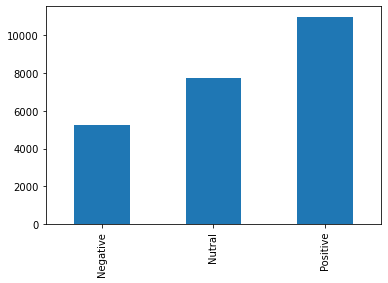

In [45]:
df1['opinion'].value_counts().sort_index().plot.bar()

In [9]:
odate= list(df1.date)

In [10]:
type(odate[0])

str

In [17]:
a= re.sub('\s^','',odate[0])

In [18]:
a

'2022-03-17 20:42:42+00:00'

In [27]:

for i in range(len(odate)):
    odate[i]= odate[i].split(' ')

In [29]:
for i in range(len(odate)):
    odate[i]= odate[i].pop(0)

In [32]:
type(odate[0])

str

In [33]:
df1['Only_date']=odate

In [43]:
df1.to_csv('imp_final_data.csv',index= False)

In [9]:
dt1= df1.groupby(['Only_date','opinion']).count()

In [16]:
dt1

tweet_id  user_name  user_location  date  text  hashtags  \
Only_date  opinion                                                              
2022-03-16 Negative        28         28             17    28    28        28   
           Nutral          62         62             40    62    62        62   
           Positive        46         46             35    46    46        46   
2022-03-17 Negative       328        328            205   328   328       328   
           Nutral         549        549            390   549   549       549   
...                       ...        ...            ...   ...   ...       ...   
2022-04-05 Nutral          25         25             12    25    25        25   
           Positive        27         27             19    27    27        27   
2022-04-06 Negative       534        534            342   534   534       534   
           Nutral         651        651            438   651   651       651   
           Positive      1144       1144            744  1144  1144      1144   

                     Sentence  word  nostop  Label  
Only_date  opinion                                  
2022-03-16 Negative        28    28      28     28  
           Nutral          62    62      62     62  
           Positive        46    46      46     46  
2022-03-17 Negative       328   328     328    328  
           Nutral         549   549     549    549  
...                       ...   ...     ...    ...  
2022-04-05 Nutral          25    25      25     25  
           Positive        27    27      27     27  
2022-04-06 Negative       534   534     534    534  
           Nutral         651   651     651    651  
           Positive      1144  1144    1144   1144  

[66 rows x 10 columns]

In [18]:
Label_set= set(df1['opinion'])

In [24]:
selected_data= pd.DataFrame()

In [8]:
dt= df1.value_counts(['Only_date','opinion'])

In [9]:
dt= df1.groupby(['Only_date','opinion']).size().reset_index(name="Time")

In [10]:
dt.head(20)

,Only_date,opinion,Time
0,2022-03-16,Negative,28
1,2022-03-16,Nutral,62
2,2022-03-16,Positive,46
3,2022-03-17,Negative,328
4,2022-03-17,Nutral,549
5,2022-03-17,Positive,745
6,2022-03-18,Negative,30
7,2022-03-18,Nutral,46
8,2022-03-18,Positive,30
9,2022-03-19,Negative,289


In [11]:
Label_set= set(dt['opinion'])

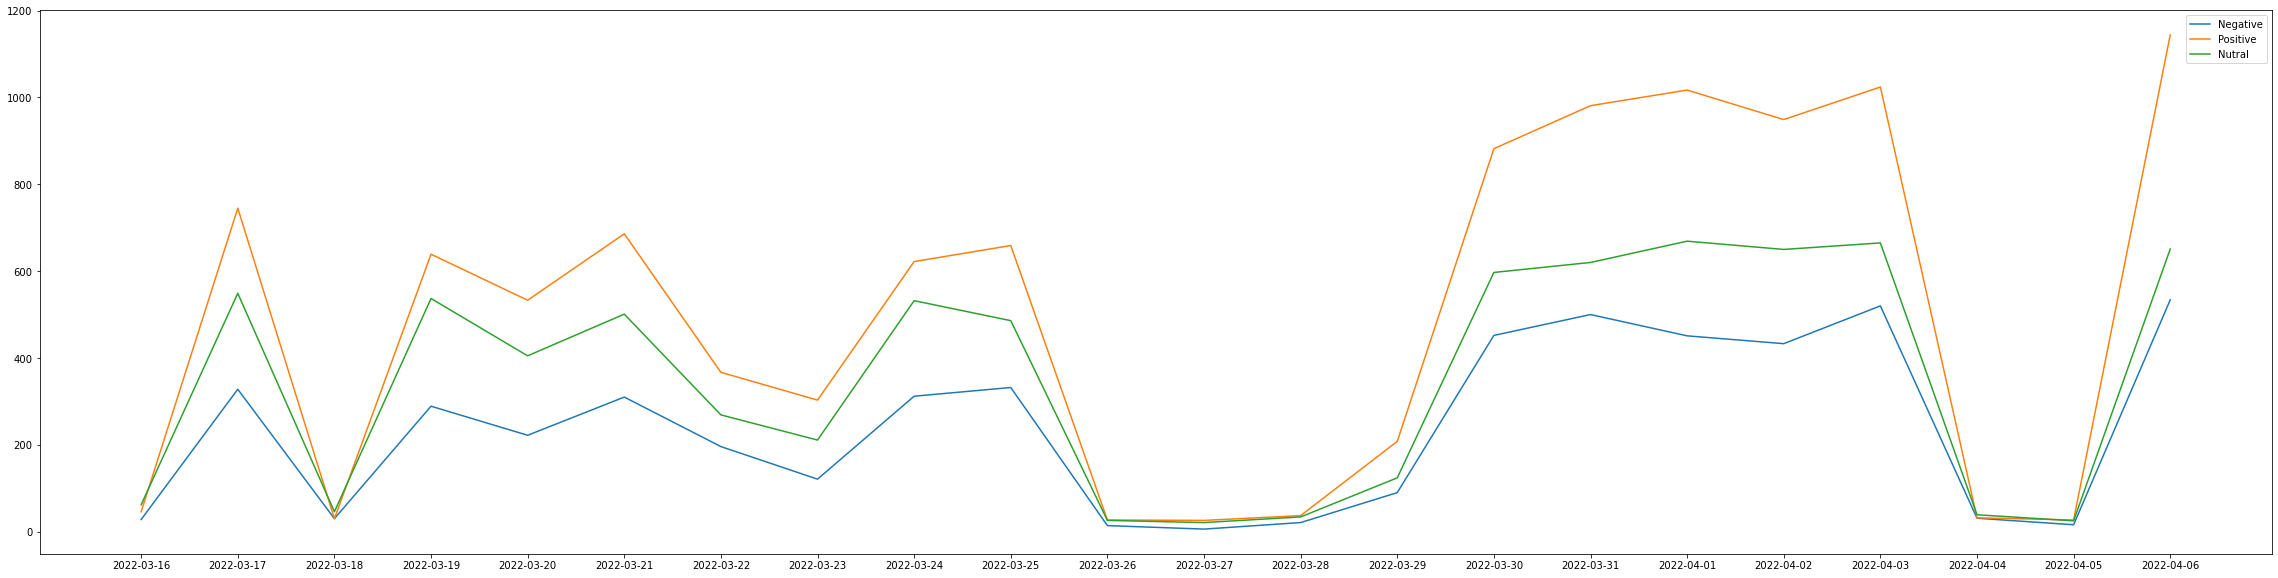

In [12]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
for label in Label_set:
    selected_data= dt.loc[dt['opinion']==label]
    plt.plot(selected_data['Only_date'],selected_data['Time'],label=label)
plt.legend()
plt.show()

In [11]:
df2=  pd.read_csv('C:\\Users\\ARUNIMA DAS\\Desktop\\pythonP\\new_imp_data.csv')

In [5]:
df2.shape

(24146, 8)

In [14]:
opinion=[]
for i in df2.Label:
    if(i <0 ):
        opinion.append('Negative')
    elif (i > 0):
        opinion.append('Positive')
    else:
         opinion.append('Nutral')
df2['opinion']= opinion

In [15]:
df2.head(10)

,tweet_id,user_name,user_location,date,text,hashtags,word,Label,opinion
0,1523770534068064257,Citadel Advantage NEWS DIGEST,NaN,2022-05-09 21:03:00+00:00,more than 600 brands have withdrawn from russi...,"['economy', 'Russia', 'sanctions', 'Ukraine', ...","['brand', 'withdrawn', 'russia', 'russian', 'c...",1,Positive
1,1523768985182896128,🇺🇦 Ukraine Under Attack,NaN,2022-05-09 20:56:50+00:00,this is funny 😄 ukraine armukrainenow russiana...,"['Ukraine', 'ArmUkraineNow', 'RussianArmy', 'Р...","['funni', 'ukrain', 'armukrainenow', 'russiana...",-1,Negative
2,1523765643098882048,Margaryta Biryukova,Украина,2022-05-09 20:43:34+00:00,"after missile strikes on odesa this evening, o...","['Odesa', 'RussianUkrainianWar']","['missil', 'strike', 'odesa', 'even', 'shop', ...",-1,Negative
3,1523763499310415872,SAJDA,NaN,2022-05-09 20:35:03+00:00,روسيا أوكرانيا updated special operation map ...,"['روسيا', 'أوكرانيا', 'UkraineRussiaWar', 'Ukr...","['روسيا', 'أوكرانيا', 'updat', 'special', 'ope...",0,Nutral
4,1523763493392236544,Globe Sentinel,NaN,2022-05-09 20:35:01+00:00,very close fighting between russian and ukrain...,"['Russian', 'Ukrainian', 'Ukraine', 'Russia', ...","['close', 'fight', 'russian', 'ukrainian', 'fo...",0,Nutral
5,1523763160217690112,BREAKING NEWS BITES,NaN,2022-05-09 20:33:42+00:00,breaking now - new video - american fighter i...,"['BREAKING', 'Ukraine', 'USArmy', 'UkraineWar'...","['break', 'new', 'video', 'american', 'fighter...",1,Positive
6,1523762688597594112,International Intrigue 🌐,NaN,2022-05-09 20:31:49+00:00,"russianukrainianwar update hosted by , where ...","['RussianUkrainianWar', 'Russia']","['russianukrainianwar', 'updat', 'host', 'poin...",-1,Negative
7,1523762223134670848,Maghrebi Arabi,NaN,2022-05-09 20:29:58+00:00,"📌 cia director william burns: ""in the long ter...",['RussianUkrainianWar'],"['cia', 'director', 'william', 'burn', 'long',...",1,Positive
8,1523760112325644289,Julia Nerberg,Ukraine,2022-05-09 20:21:35+00:00,i wish i could write long text regarding all t...,"['Ukraine', 'Odessa', 'Russian', 'Russia', 'mi...","['wish', 'write', 'long', 'text', 'regard', 'u...",1,Positive
9,1523759772264439809,S K Tiwari,Space,2022-05-09 20:20:14+00:00,america’s pres. biden signs 'ukraine democracy...,"['Ukraine', 'BidensAmerica', 'Biden', 'Ukraine...","['america', 'pre', 'biden', 'sign', 'democraci...",-1,Negative


<AxesSubplot:>

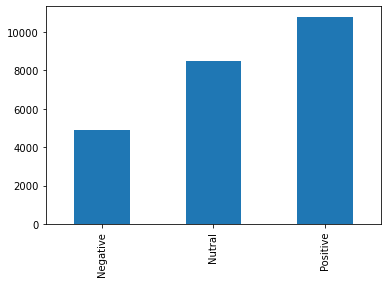

In [19]:
df2['opinion'].value_counts().sort_index().plot.bar()

In [16]:
odate= list(df2.date)
for i in range(len(odate)):
    odate[i]= odate[i].split(' ')
for i in range(len(odate)):
    odate[i]= odate[i].pop(0)

In [17]:
df2['Only_date']= odate

In [18]:
df2.head(10)

,tweet_id,user_name,user_location,date,text,hashtags,word,Label,opinion,Only_date
0,1523770534068064257,Citadel Advantage NEWS DIGEST,NaN,2022-05-09 21:03:00+00:00,more than 600 brands have withdrawn from russi...,"['economy', 'Russia', 'sanctions', 'Ukraine', ...","['brand', 'withdrawn', 'russia', 'russian', 'c...",1,Positive,2022-05-09
1,1523768985182896128,🇺🇦 Ukraine Under Attack,NaN,2022-05-09 20:56:50+00:00,this is funny 😄 ukraine armukrainenow russiana...,"['Ukraine', 'ArmUkraineNow', 'RussianArmy', 'Р...","['funni', 'ukrain', 'armukrainenow', 'russiana...",-1,Negative,2022-05-09
2,1523765643098882048,Margaryta Biryukova,Украина,2022-05-09 20:43:34+00:00,"after missile strikes on odesa this evening, o...","['Odesa', 'RussianUkrainianWar']","['missil', 'strike', 'odesa', 'even', 'shop', ...",-1,Negative,2022-05-09
3,1523763499310415872,SAJDA,NaN,2022-05-09 20:35:03+00:00,روسيا أوكرانيا updated special operation map ...,"['روسيا', 'أوكرانيا', 'UkraineRussiaWar', 'Ukr...","['روسيا', 'أوكرانيا', 'updat', 'special', 'ope...",0,Nutral,2022-05-09
4,1523763493392236544,Globe Sentinel,NaN,2022-05-09 20:35:01+00:00,very close fighting between russian and ukrain...,"['Russian', 'Ukrainian', 'Ukraine', 'Russia', ...","['close', 'fight', 'russian', 'ukrainian', 'fo...",0,Nutral,2022-05-09
5,1523763160217690112,BREAKING NEWS BITES,NaN,2022-05-09 20:33:42+00:00,breaking now - new video - american fighter i...,"['BREAKING', 'Ukraine', 'USArmy', 'UkraineWar'...","['break', 'new', 'video', 'american', 'fighter...",1,Positive,2022-05-09
6,1523762688597594112,International Intrigue 🌐,NaN,2022-05-09 20:31:49+00:00,"russianukrainianwar update hosted by , where ...","['RussianUkrainianWar', 'Russia']","['russianukrainianwar', 'updat', 'host', 'poin...",-1,Negative,2022-05-09
7,1523762223134670848,Maghrebi Arabi,NaN,2022-05-09 20:29:58+00:00,"📌 cia director william burns: ""in the long ter...",['RussianUkrainianWar'],"['cia', 'director', 'william', 'burn', 'long',...",1,Positive,2022-05-09
8,1523760112325644289,Julia Nerberg,Ukraine,2022-05-09 20:21:35+00:00,i wish i could write long text regarding all t...,"['Ukraine', 'Odessa', 'Russian', 'Russia', 'mi...","['wish', 'write', 'long', 'text', 'regard', 'u...",1,Positive,2022-05-09
9,1523759772264439809,S K Tiwari,Space,2022-05-09 20:20:14+00:00,america’s pres. biden signs 'ukraine democracy...,"['Ukraine', 'BidensAmerica', 'Biden', 'Ukraine...","['america', 'pre', 'biden', 'sign', 'democraci...",-1,Negative,2022-05-09


In [19]:
dt= df2.groupby(['Only_date','opinion']).size().reset_index(name="Time")

In [20]:
Label_set= set(dt['opinion'])

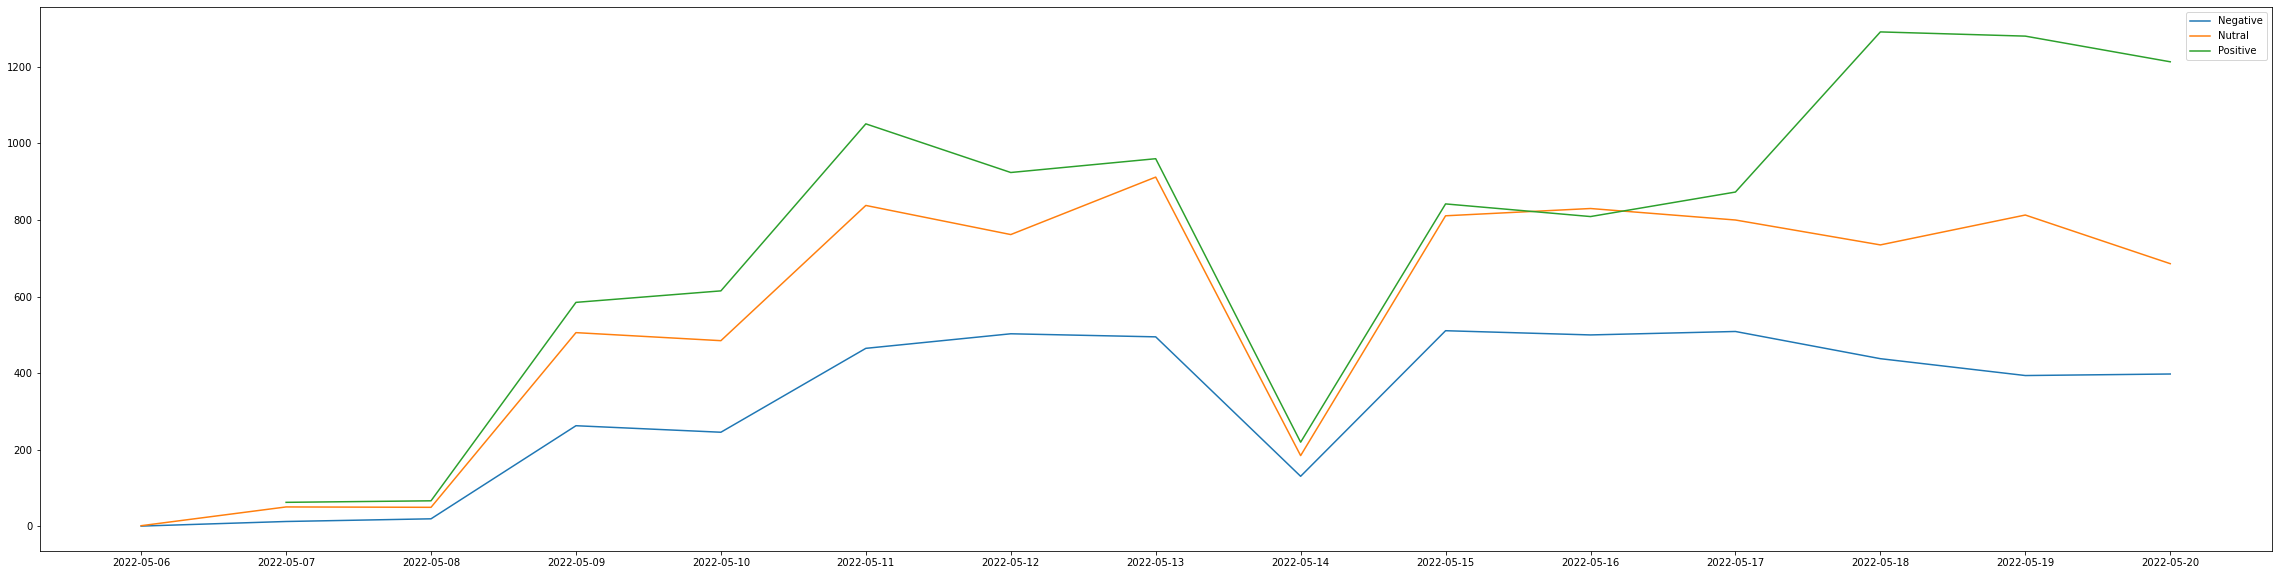

In [21]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
for label in Label_set:
    selected_data= dt.loc[dt['opinion']==label]
    plt.plot(selected_data['Only_date'],selected_data['Time'],label=label)
plt.legend()
plt.show()

In [22]:
data= df1['opinion'].value_counts()

In [23]:
data2= df2['opinion'].value_counts()

In [33]:
data2

Positive    10793
Nutral       8466
Negative     4887
Name: opinion, dtype: int64

In [24]:
dt1= pd.DataFrame()

In [25]:
dt1['May']= data2

In [27]:
dt1['March']= data

In [28]:
dt1

,May,March
Positive,10793,10984
Nutral,8466,7719
Negative,4887,5236


In [29]:
dt1['Label']= ['Positive', 'Nutral', 'Negative']

In [30]:
dt1

,May,March,Label
Positive,10793,10984,Positive
Nutral,8466,7719,Nutral
Negative,4887,5236,Negative


<AxesSubplot:xlabel='Label'>

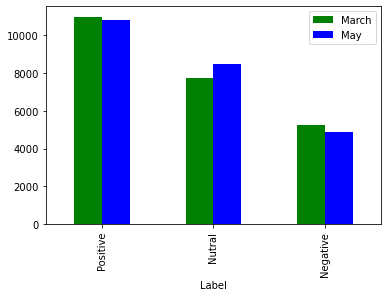

In [32]:
dt1.plot(x="Label", y=["March", "May"], kind="bar",color=["green","blue"])

In [11]:
df1.head()

,tweet_id,user_name,user_location,date,text,hashtags,Sentence,word,nostop,Label,Only_date,opinion
0,1.504560e+18,PMESII,Antarctica,2022-03-17 20:42:42+00:00,russian occupants in the homes of ukrainian c...,"['Russian', 'Ukrainian', 'UkraineRussiaWar', '...",[' russian occupants in the homes of ukrainian...,"['russian', 'occup', 'home', 'ukrainian', 'civ...","['russian', 'occup', 'home', 'ukrainian', 'civ...",1,2022-03-17,Positive
1,1.504560e+18,RED Python (EngD PhD),United States,2022-03-17 20:42:28+00:00,the worst leadership of a country ever ukraine...,"['UkraineRussiaWar', 'UkraineUnderAttack', 'Uk...",['the worst leadership of a country ever ukrai...,"['bad', 'leadership', 'countri', 'ukrainerussi...","['bad', 'leadership', 'countri', 'ukrainerussi...",1,2022-03-17,Positive
2,1.504560e+18,JimOnLight,"Dallas, TX",2022-03-17 20:42:27+00:00,tears. take a handful of minutes and watch. ru...,"['RussianUkrainianWar', 'SlavaUkraini']","['tears.', 'take a handful of minutes and watc...","['tear', 'hand', 'minut', 'watch', 'russianukr...","['tear', 'hand', 'minut', 'watch', 'russianukr...",0,2022-03-17,Nutral
3,1.504560e+18,Peter Brandt,"Paombong, Central Luzon",2022-03-17 20:41:51+00:00,putin allegedly arrests his own military chief...,"['Ukraine', 'UkraineWar', 'UkraineUnderAttack'...",['putin allegedly arrests his own military chi...,"['putin', 'allegedli', 'arrest', 'militari', '...","['putin', 'allegedli', 'arrest', 'militari', '...",-1,2022-03-17,Negative
4,1.504560e+18,World news,NaN,2022-03-17 20:41:37+00:00,scenes of destruction left by the russian army...,"['UkraineRussiaWar', 'Mariupol', 'UkraineRussi...",['scenes of destruction left by the russian ar...,"['scene', 'destruct', 'left', 'russian', 'armi...","['scene', 'destruct', 'left', 'russian', 'armi...",0,2022-03-17,Nutral


In [ ]:
df1